In [70]:
!pip install h5py pip install typing-extensions pip install wheel

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.10.0
Uninstalling scipy-1.10.0:
  Successfully uninstalled scipy-1.10.0


In [71]:
!pip install setuptools
!pip install numpy
!pip install scipy

  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires scipy>=1.3; (python_version > "3.9" or platform_system != "Windows" or platform_machine != "x86") and python_version < "3.12", which is not installed.
scikit-learn 1.2.1 requires scipy>=1.3.2, which is not installed.
scikit-image 0.19.3 requires scipy>=1.4.1, which is not installed.
imbalanced-learn 0.10.1 requires scipy>=1.3.2, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
gensim 4.3.0 requires scipy>=1.7.0, which is not installed.
datashader 0.14.4 requires scipy, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [13]:
import pandas as pd
import scipy.stats as stats

In [14]:
from statsmodels.stats.proportion import proportions_ztest

### p.269

In [15]:
df = pd.read_csv("/home/piai/문서/1 Big Data 분석 기초/2sample_t_test.csv", encoding = 'euc-kr')

In [16]:
df.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [17]:
df = df.dropna(axis = 0)

In [18]:
data1 = df['Mat_A']

#정규성 검정
statistic, p = stats.shapiro(data1)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.906264066696167, p-value=0.2563020884990692


귀무가설 : 정규분포를 따른다.
대립가설 : 정규분포를 따르지 않는다.
95% 신뢰수준으로 정규성 검정 결과, p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 정규분포라고 판단할 수 있다.

In [19]:
data2 = df['Mat_B']

#정규성 검정
statistic, p = stats.shapiro(data2)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.9729753732681274, p-value=0.9169775247573853


귀무가설 : 정규분포를 따른다.
대립가설 : 정규분포를 따르지 않는다.
95% 신뢰수준으로 정규성 검정 결과, p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 정규분포라고 판단할 수 있다.

### p.272

In [20]:
df = pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})

# 정규분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc = df.mean(), scale = 3.8/np.sqrt(20))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([17.83],[21.17])


표본 평균 df.mean()을 이용해서 구한 범위(17.83 , 21.17) 내에 평균이 있을 확률이 95%이다

표본크기가 20인 표본들이 반복적으로 추출되면,  (17.83 , 21.17)의 구간 안에 모평균을 포함하고 있을 확률이 95%이고,  나머지 5%는 모평균을 포함하고 있지 않은 구간을 생성한다.

즉, 모평균이 어디에 위치하고있을 확률을 말하는 것이 아니라, 표본평균에서 모평균을 95%의 확률로 포함할 구간은 (17.83 , 21.17)이다.

### p. 275

In [21]:
df = pd.DataFrame({'Sample': [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})

# 정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df) - 1, loc=df.mean()[0], scale=stats.sem(df))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6],[72.4])


모표준편차를 모르는 경우이다. 모표준편차를 아는 경우에는 scale에 모표준편자/sqrt(개수)를 넣었지만 이번 문제는 모표준편차가 알려져 있지 않으므로 scale에 sem(standard error of mean)을 사용하였다. s/sqrt(n)

결과 해석은 위와 유사한 방법으로,

표본 평균 df.mean()을 이용해서 구한 범위(70.6 , 72.4) 내에 평균이 있을 확률이 95%이다

표본크기가 20인 표본들이 반복적으로 추출되면,  (70.6 , 72.4)의 구간 안에 모평균을 포함하고 있을 확률이 95%이고,  나머지 5%는 모평균을 포함하고 있지 않은 구간을 생성한다.

즉, 모평균이 어디에 위치하고있을 확률을 말하는 것이 아니라, 표본평균에서 모평균을 95%의 확률로 포함할 구간은 (70.6 , 72.4)이다.

### p.301

<Axes: >

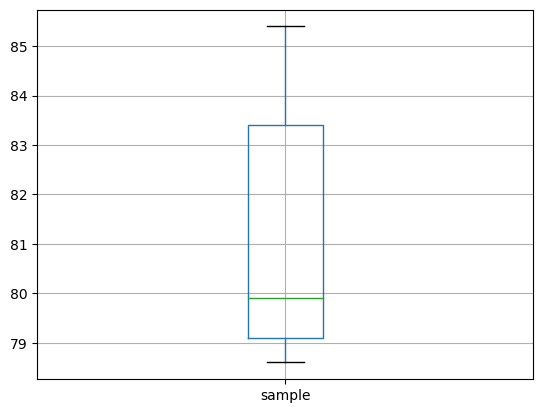

In [22]:
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6,
                             78.6, 85.4,83.4,79.2]})

df.boxplot(['sample'])

In [23]:
# 1-sample t-test
t_result = stats.ttest_1samp(df,78.0)

# 1-sample t-test의 t값, p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print(" t통계량 : {}".format(t))
print(" p-value : {}".format(p))

1-Sample t-test
 t통계량 : [3.591]
 p-value : [0.007]


1-sample t_test는 단일집단에 대한 모평균의 검정, 단일 집단의 평균이 기존에 주장하는 평균과 다른지에 대한 검정을 한다. 

유의수준 5%에서 검정결과 p값이 0.007이므로 개선활동이 만족도를 변화시켰다고 할 수 있다. p값이 작으면 우연수준 차이가 아니라 실제 차이가 있다고 결론내릴 수 있기 때문이다. 


### p.303

In [24]:
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                  'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

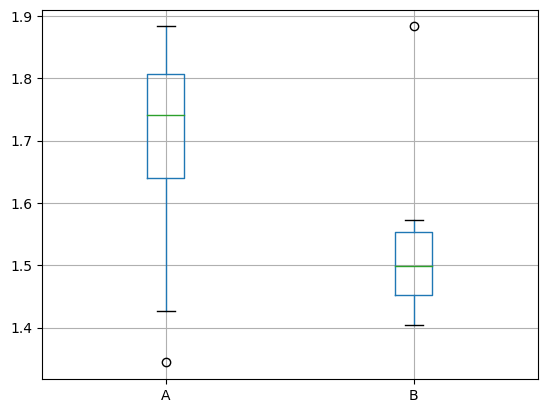

In [25]:
df.boxplot(['A','B'])
plt.show()

In [26]:
#'A','B' 정규성 검정 : Shapiro-Wilk Test

statistic, p = stats.shapiro(df['A'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.8425754904747009, p-value=0.08004532009363174
Shapiro-Wilk Test : statistic=0.7734811902046204, p-value=0.014793740585446358


두 집단에 대한 평균 차이를 검정하려고 할 때 2 sample t_test를 한다. 

 Shapiro-Wilk 테스트의 귀무가설 :  데이터가 정규분포를 따른다
 
 대립가설은:데이터가 정규분포를 따르지 않는다

A집단은 p-value가 0.08으로 귀무가설을 기각할 증거가 부족하므로 귀무가설을 채택할 수 있다. 

B집단은 p-value가 0.01으로 귀무가설을 기각한다. 

In [27]:
# 등분산성 검정
print(stats.levene(df['A'],df['B']))

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)


두 집단을 검정하기 때문에 두 집단 간의 분산이 동일한지 먼저 확인해야 한다.만

두 집단이 모두 정규분포를 따른 다면 bartlett's test로 등분산성을 검정하겠지만, 이 경우 B집단이 정규분포를 따르지 않으므로 levene's test로 등분산성을 검정한다.

귀무가설 : 등분산성이다 /  대립가설 : 등분산성이 아니다

p-value가 약 0.5이기 때문에 크므로 귀무가설을 채택할 수 있다. 

따라서 두 집단은 등분산성이라고 할 수 있다.

In [28]:
# 2-sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-sample t-test의 t값, p값 출력
print('2-sample t-test')
print(" t :{}".format(t))
print(" p :{}".format(p))

2-sample t-test
 t :1.7
 p :0.111


두 집단이 등분산성이므로 student's T test를 시행한다.
귀무가설 : 두 집단의 모평균 간 차이가 없다.
대립가설 : 두 집단의 모평균 간 차이가 있다.
유의수준 5%에서 검정결과 p값이 0.111이므로 귀무가설을 채택하여, 공급자 간에 모평균에 차이가 있다고 할 수 없다. p값이 크면 실제 차이가 없다고 결론내릴 수 있기 때문이다.

### p.307

In [29]:
df1 = pd.DataFrame({'before': [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after' : [710,580,787,712,750,600,782,670,790,680]})

# paired t-test
t_result = stats.ttest_rel(df1, df2)

# paired t-test의 p값, t값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

#paired t-test의 t-값, p값 출력
print('paired t-test')
print(" t :{}".format(t))
print(" p :{}".format(p))

paired t-test
 t :[-2.266]
 p :[0.05]


귀무가설 : 학원가기전과 후의 차이가 없다

대립가설 : 학원가기전과 후의 차이가 있다

유의 수준 5%에서 검정결과 p값이 0.05이기 때문에 귀무가설을 기각해야 한다. 따라서 학원가기 전과 후의 차이가 있다고 할 수 있다. 

### p.311

In [30]:
# 변수 선언
count = 40
n_obs = 100
value = 0.5

# proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# proportion test의 t-값, p값 출력
print('proportion t-test')
print(" t :{}".format(stat))
print(" p :{}".format(pval))

proportion t-test
 t :-2.0412414523193148
 p :0.0412268333371637


귀무가설 : 이 동전은 정상이다 p = 0.5

대립가설 : 이 동전은 비정상이다 p != 0.5

유의 수준 5%에서 검정결과 p값이 0.04이기 때문에 귀무가설을 기각해야 한다. 따라서 이 동전은 비정상이라고 할 수 있다.


### p.315

In [31]:
# 변수 선언
count = np.array([14, 5])
nobs = np.array([1200, 1200])

# proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# proportion test 결과 출력
print("2 proportion test")
print(" z : {0:0.3f}".format(stat))
print(" p : {0:0.3f}".format(pval))

2 proportion test
 z : 2.073
 p : 0.038


h0 : p1 = p2 두 공장의 불량률은 같다

h1 : p1 != p2 두 공장의 불량률은 같지 않다.

p-value가 0.05보다 작으므로 귀무가설을 기각할 수 있다. 

귀무가설을 기각하고 대립가설을 채택하면 결국 두 공장의 불량률은 같지 않다. 

즉, 두 공장의 불량률에는 유의미한 차이가 있다라고 결론내릴 수 있다.

### p.323

In [32]:
df = pd.read_csv("/home/piai/다운로드/통계data/카이제곱_노트북.csv", encoding = 'euc-kr')

In [33]:
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,2,2,1,1,1,25
2,14,14,3,2,3,8
3,5,5,4,3,1,10
4,5,5,9,2,1,2


In [34]:
# chi-squre test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)


# chi-squre test 결과 출력
print("chi-square test")
print("chisq :{0:0.3f}".format(chi))
print("p :{0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected))

chi-square test
chisq :95.759
p :0.000
degree of freedom : 30
expected value : 
[[10.22421525  8.43049327  5.38116592  3.94618834  1.97309417 10.04484305]
 [ 8.1793722   6.74439462  4.30493274  3.15695067  1.57847534  8.03587444]
 [11.24663677  9.2735426   5.91928251  4.34080717  2.17040359 11.04932735]
 [ 7.15695067  5.90134529  3.76681614  2.76233184  1.38116592  7.03139013]
 [ 6.13452915  5.05829596  3.22869955  2.367713    1.1838565   6.02690583]
 [ 8.1793722   6.74439462  4.30493274  3.15695067  1.57847534  8.03587444]
 [ 5.87892377  4.84753363  3.0941704   2.2690583   1.13452915  5.77578475]]


h0 : 각 제품에 대해 이미지에 대해 차이가 없다(=같다)

h1 : 각 제품에 대해 이미지에 대해 차이가 있다.

p-value가 0.000이므로 귀무가설을 기각하고 대립가설을 채택한다. 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다. 

In [35]:
alpha = 0.05
critical_value = stats.chi2.ppf(q=1-alpha, df=dof)
print("임게치 :", critical_value.round(3))

임게치 : 43.773


위에서 카이제곱검정통계량은 chisq :95.759이 나왔다.

chisq 95.759 > 임계치 43.773 

카이제곱 검정통계량이 크다는 것은 실측치 대비 기대치의 차이가 크다는 것을 의미함으로 귀무가설을 기각하게 된다. 

### p.329

In [36]:
df = pd.read_csv("/home/piai/문서/1 Big Data 분석 기초/ANOVA.csv", encoding = 'euc-kr')

In [37]:
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


#### 강종 별로 2차 정련시간의 차이가 있는지

In [38]:
# 강종 별로 시간 추출
df_time_by_gangjong = df.groupby('gangjong')['time'].apply(list).apply(pd.Series).reset_index()
df_1 = df_time_by_gangjong.T
df_1.drop('gangjong', axis = 0, inplace = True)
df_1.columns = ['a', 'b', 'c', 'd']
df_1

,a,b,c,d
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


In [39]:
# a, b, c, d 강종의 정규성 검정
statistic, p = stats.shapiro(df_1['a'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df_1['b'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df_1['c'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df_1['d'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.9879403114318848, p-value=0.983557939529419
Shapiro-Wilk Test : statistic=0.9769707918167114, p-value=0.9355478286743164
Shapiro-Wilk Test : statistic=0.8929420113563538, p-value=0.3338908553123474
Shapiro-Wilk Test : statistic=0.9713904857635498, p-value=0.901641845703125


Shapiro-Wilk 테스트의 귀무가설 : 데이터가 정규분포를 따른다

대립가설은:데이터가 정규분포를 따르지 않는다

95% 신뢰수준으로 정규성 검정 결과, 

a, b, c, d 모두 p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 정규분포라고 판단할 수 있다.


In [40]:
# a, b, c, d 등분산성 검정 
print(stats.bartlett(df_1['a'],df_1['b'],df_1['c']),df_1['d'])

BartlettResult(statistic=1.7392223273800593, pvalue=0.4191144844976227) 0    26.7
1    28.5
2    30.9
3    26.2
4    32.3
5    23.7
Name: d, dtype: object


 정규분포라고 판단되므로 bartlett test를 시행할 수 있다
 
 bartlett test의 귀무가설은 모든 데이터셋이 등분산성이다.
 
 대립가설은 등분산성이 아니다.
 
 p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 a, b, c, d는 등분산성라고 판단할 수 있다.

In [41]:
# anova 실행
result = stats.f_oneway(df_1['a'],df_1['b'],df_1['c'],df_1['d'])

# anova f값 p값 저장
f, p = result.statistic.round(3), result.pvalue.round(3)

# anova f값 p값 출력
print("one-way")
print(" F 통계량 : ", f)
print(" p-value : ", p)

one-way
 F 통계량 :  4.172
 p-value :  0.019


h0 = 강종별로 2차 정련시간의 차이가 없다. (모두 동일하다)
h1 = 강종별로 2차 정련시간의 차이가 있다.
유의수준 5%에서 검정결과 p값이 0.019이므로 그룹 간의 평균 차이가 있다고 할 수 있다.

#### type 별로 2차 정련시간의 차이가 있는지

In [42]:
df.columns

Index(['time', 'charge', 'gangjong', 'type'], dtype='object')

In [43]:
# type 별로 시간 추출
df_time_by_type = df.groupby('type')['time'].apply(list).apply(pd.Series).reset_index()
df_2 = df_time_by_type.T
df_2.drop('type', axis = 0, inplace = True)
df_2.columns = ['a', 'b']
df_2

,a,b
0,32.2,32.6
1,30.4,32.7
2,33.6,29.3
3,36.4,25.9
4,33.9,31.1
5,34.9,23.8
6,33.1,26.7
7,29.9,28.5
8,31.7,30.9
9,27.5,26.2


In [44]:
# a, b type의 정규성 검정
statistic, p = stats.shapiro(df_2['a'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df_2['b'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.982139527797699, p-value=0.9907686114311218
Shapiro-Wilk Test : statistic=0.9098271131515503, p-value=0.2122616022825241


대립가설은:데이터가 정규분포를 따르지 않는다

95% 신뢰수준으로 정규성 검정 결과, 

a, b 모두 p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 정규분포라고 판단할 수 있다.


In [45]:
# a, b 등분산성 검정 
print(stats.bartlett(df_2['a'],df_2['b']))

BartlettResult(statistic=0.9529700642151171, pvalue=0.3289644435379069)


 정규분포라고 판단되므로 bartlett test를 시행할 수 있다
 
 bartlett test의 귀무가설은 모든 데이터셋이 등분산성이다.
 
 대립가설은 등분산성이 아니다.
 
 p-value가 0.05보다 크기 때문에 귀무가설을 채택하고 a, b는 등분산성라고 판단할 수 있다.

In [46]:
# anova 실행
result = stats.f_oneway(df_2['a'],df_2['b'])

# anova f값 p값 저장
f, p = result.statistic.round(3), result.pvalue.round(3)

# anova f값 p값 출력
print("one-way")
print(" F 통계량 : ", f)
print(" p-value : ", p)

one-way
 F 통계량 :  9.654
 p-value :  0.005


h0 = type별로 2차 정련시간의 차이가 없다. (모두 동일하다)

h1 = type별로 2차 정련시간의 차이가 있다.

유의수준 5%에서 검정결과 p값이 0.005이므로 type 간의 2차 정련시간의 평균 차이가 있다고 할 수 있다.

### p.334

In [47]:
df = pd.read_csv("/home/piai/문서/1 Big Data 분석 기초/correaltion.csv", encoding = 'euc-kr')

In [48]:
df.isnull().sum()

strength    0
temp        0
Quantity    0
b_time      0
Oven_TMP    0
dtype: int64

In [49]:
df1 = df['strength']
df2 = df['temp']

# correlation analysis
corr, pval = stats.pearsonr(df1, df2)

# correlation p-value
print("Correlation analysis")
print(" corr:{0:0.3f}".format(corr))
print(" p-value:{0:0.3f}".format(pval))

Correlation analysis
 corr:-0.899
 p-value:0.000


유의수준 5%에서 검정결과 p값이 0.000이므로 초코칩의 강도와 재료반죽온도 간에 매우 상관성이 있다고 할 수 있다.

반죽온도가 낮을수록 초코칩의 강도가 강하다고 할 수 있다.

단 두 변수 간의 연관된 정도를 나타낼 뿐 인과관계까지 설명해주지는 않는다. 

상관계수는 변수 척도의 단위에 영향을 받지 않는다